In [0]:
!pip install turicreate

     |████████████████████████████████| 91.9MB 60kB/s 
     |████████████████████████████████| 327kB 30.6MB/s 
     |████████████████████████████████| 86.3MB 49kB/s 
     |████████████████████████████████| 3.4MB 46.5MB/s 
     |████████████████████████████████| 450kB 44.1MB/s 
     |████████████████████████████████| 3.8MB 43.4MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=3b67e3be9d283eeaa581c7d89f7f3b51ff5849bd80b40b1093efcde038b09a25
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=3b2049d25918f31d3e12d1a0e4390ea99c56a3ba92f624a531ea828badfff695
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Fo

In [0]:
import turicreate

# **Load a comman image analysis dataset**

In [0]:
image_train = turicreate.SFrame('/content/drive/My Drive/Colab Notebooks/Machine Learning/Week6/Practice/image_train_data/')
image_test = turicreate.SFrame('/content/drive/My Drive/Colab Notebooks/Machine Learning/Week6/Practice/image_test_data/')

# **Train a nearest-neighbour model for retrieving images using deep featres**

In [0]:
knn_model = turicreate.nearest_neighbors.create(image_train,
                                                features=['deep_features'],
                                                label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# **Task 1: Compute summary statistics of the data**
Sketch summaries are techniques for computing summary statistics of data very quickly. In GraphLab Create, SFrames and SArrays include a method:

.sketch_summary()
which computes such summary statistics. Using the training data, compute the sketch summary of the ‘label’ column and interpret the results. What’s the least common category in the training data?

In [0]:
sketch = turicreate.Sketch(image_train['label'])

In [0]:
sketch_summary = image_train['label'].summary()

In [0]:
sketch_summary


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


# **Task 2: Create category-specific image retrieval models**
In most retrieval tasks, the data we have is unlabeled, thus we call these unsupervised learning problems. However, we have labels in this image dataset, and will use these to create one model for each of the 4 image categories, {‘dog’,’cat’,’automobile’,bird’}. To start, follow these steps:


Similarly to the image retrieval notebook you downloaded, you are going to create a nearest neighbor model using the 'deep_features' as the features, but this time create one such model for each category, using the training_data. You can call the model with the ‘dog’ data the dog_model, the one with the ‘cat’ data the cat_model, as so on. You now have a nearest neighbors model that can find the nearest ‘dog’ to any image you give it, the dog_model; one that can find the nearest ‘cat’, the cat_model; and so on.


*   Split the SFrame with the training data into 4 different SFrames. Each of these will contain data for 1 of the 4 categories above. Hint: if you use a logical filter to select the rows where the ‘label’ column equals ‘dog’, you can create an SFrame with only the data for images labeled ‘dog’.

*   Similarly to the image retrieval notebook you downloaded, you are going to create a nearest neighbor model using the 'deep_features' as the features, but this time create one such model for each category, using the training_data. You can call the model with the ‘dog’ data the dog_model, the one with the ‘cat’ data the cat_model, as so on. You now have a nearest neighbors model that can find the nearest ‘dog’ to any image you give it, the dog_model; one that can find the nearest ‘cat’, the cat_model; and so on.


Using these models, answer the following questions. The cat image below is the first in the test data

You can access this image, similarly to what we did in the iPython notebooks above, with this command:

    image_test[0:1]
 
  What is the nearest ‘cat’ labeled image in the training data to the cat image above (the first image in the test data)?

### **a) Split training data into 4 different categories**

In [0]:
automobile = image_train.filter_by(['automobile'],'label')
cat = image_train.filter_by(['cat'],'label')
dog = image_train.filter_by(['dog'],'label')
bird = image_train.filter_by(['bird'],'label')

### **b) Create nearest neighbor model for each category**

In [0]:
automobile_model  = turicreate.nearest_neighbors.create(automobile, features=['deep_features'],
                                                     label='id')

cat_model  = turicreate.nearest_neighbors.create(cat, features=['deep_features'],
                                                     label='id')

dog_model  = turicreate.nearest_neighbors.create(dog, features=['deep_features'],
                                                     label='id')

bird_model  = turicreate.nearest_neighbors.create(bird, features=['deep_features'],
                                                     label='id')


Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

,SArray
0,

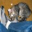

In [0]:
image_test['image'][0:1].explore()

In [0]:
cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 21.665ms     |

| Done         |         | 100         | 83.586ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [0]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

**What is the nearest ‘cat’ labeled image in the training data to the cat image above (the first image in the test data)?**

,SArray
0,

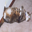

In [0]:
cat_image = image_train[image_train['id']==16289]
cat_image['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 22.411ms     |

| Done         |         | 100         | 88.349ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

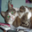
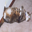
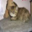
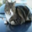
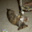

In [0]:
get_images_from_ids(cat_model.query(image_test[0:1]))['image'].explore()

**What is the nearest ‘dog’ labeled image in the training data to the cat image above (the first image in the test data)?**

In [0]:
dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 18.434ms     |

| Done         |         | 100         | 81.931ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,SArray
0,

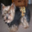

In [0]:
dog_image = image_train[image_train['id']==16976]
dog_image['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 14.633ms     |

| Done         |         | 100         | 80.291ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

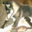
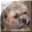
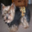
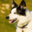
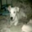

In [0]:
get_images_from_ids(dog_model.query(image_test[0:1]))['image'].explore()

# **Task 3: Try a simple example of nearest-neighbors classification**

When we queried a nearest neighbors model, the ‘distance’ column in the table above shows the computed distance between the input and each of the retrieved neighbors. In this question, you will use these distances to perform a classification task, using the idea of a nearest-neighbors classifier.



*   For the first image in the test data (image_test[0:1]), 
which we used above, compute the mean distance between this image at its 5 nearest neighbors that were labeled ‘cat’ in the training data (similarly to what you did in the previous question). Save this result.

*   Similarly, for the first image in the test data (image_test[0:1]), which we used above, compute the mean distance between this image at its 5 nearest neighbors that were labeled ‘dog’ in the training data (similarly to what you did in the previous question). Save this result.

*   On average, is the first image in the test data closer  to its 5 nearest neighbors in the ‘cat’ data or in the ‘dog’ data? (In a later course, we will see that this is an example of what is called a k-nearest neighbors classifier, where we use the label of neighboring points to predict the label of a test point.)






In [0]:
cat_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 28.903ms     |

| Done         |         | 100         | 110.138ms    |

+--------------+---------+-------------+--------------+

36.15573070978294

In [0]:
dog_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 32.55ms      |

| Done         |         | 100         | 106.297ms    |

+--------------+---------+-------------+--------------+

37.77071136184157

# **Task 4: Compute nearest neighbors accuracy**
A nearest neighbor classifier predicts the label of a point as the most common label of its nearest neighbors. In this question, we will measure the accuracy of a 1-nearest-neighbor classifier, i.e., predict the output as the label of the nearest neighbor in the training data. Although there are simpler ways of computing this result, we will go step-by-step here to introduce you to more concepts in nearest neighbors and SFrames, which will be useful later in this Specialization.



*   Training models: For this question, you will need the nearest neighbors models you learned above on the training data, i.e., the dog_model, cat_model, automobile_model and bird_model.

*   Spliting test data by label: Above, you split the train data SFrame into one SFrame for images labeled ‘dog’, another for those labeled ‘cat’, etc. Now, do the same for the test data. You can call the resulting SFrames



    image_test_cat, image_test_dog, image_test_bird, image_test_automobile

In [0]:
image_test_automobile = image_test.filter_by(['automobile'],'label')
image_test_cat = image_test.filter_by(['cat'],'label')
image_test_dog = image_test.filter_by(['dog'],'label')
image_test_bird = image_test.filter_by(['bird'],'label')

 

Finding nearest neighbors in the training set for each part of the test set: Thus far, we have queried, 
    
      e.g. dog_model.query()

our nearest neighbors models with a single image as the input, but you can actually query with a whole set of data, and it will find the nearest neighbors for each data point. Note that the input index will be stored in the ‘query_label’ column of the output SFrame.

Using this knowledge find the closest neighbor in to the dog test data using each of the trained models, 
     
     e.g. dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

finds 1 neighbor (that’s what k=1 does) to the dog test images (image_test_dog) in the cat portion of the training data (used to train the cat_model).

Now, do this for every combination of the labels in the training and test data.



*   Create an SFrame with the distances from ‘dog’ test examples to the respective nearest neighbors in each class in the training data: The ‘distance’ column in dog_cat_neighbors above contains the distance between each ‘dog’ image in the test set and its nearest ‘cat’ image in the training set. The question we want to answer is how many of the test set ‘dog’ images are closer to a ‘dog’ in the training set than to a ‘cat’, ‘automobile’ or ‘bird’. So, next we will create an SFrame containing just these distances per data point. The goal is to create an SFrame called dog_distances with 4 columns:



1. dog_distances[‘dog-dog’] ---- storing dog_dog_neighbors[‘distance’]

2. dog_distances[‘dog-cat’] ---- storing dog_cat_neighbors[‘distance’]

3. dog_distances[‘dog-automobile’] ---- storing dog_automobile_neighbors[‘distance’]

4. dog_distances[‘dog-bird’] ---- storing dog_bird_neighbors[‘distance’]





  

In [0]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 670.076ms    |

| Done         | 509000  | 100         | 692.801ms    |

+--------------+---------+-------------+--------------+

In [0]:
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 701.932ms    |

| Done         | 509000  | 100         | 705.322ms    |

+--------------+---------+-------------+--------------+

In [0]:
dog_automobile_neighbors = automobile_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 675.532ms    |

| Done         | 509000  | 100         | 690.618ms    |

+--------------+---------+-------------+--------------+

In [0]:
dog_bird_neighbors = bird_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 239000  | 50          | 685.212ms    |

| Done         | 478000  | 100         | 691.02ms     |

+--------------+---------+-------------+--------------+

### Compute Dog distances

In [0]:
dog_distances = turicreate.SFrame({'dog_automobile': dog_automobile_neighbors['distance'],
                              'dog_bird': dog_bird_neighbors['distance'],
                              'dog_cat': dog_cat_neighbors['distance'],
                              'dog_dog': dog_dog_neighbors['distance']
                             })

In [0]:
dog_distances.head()

dog_automobile,dog_bird,dog_cat,dog_dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


Computing the number of correct predictions using 1-nearest neighbors for the dog class: Now that you have created the SFrame dog_distances, you will learn to use the method
    
    .apply()
on this SFrame to iterate line by line and compute the number of ‘dog’ test examples where the distance to the nearest ‘dog’ was lower than that to the other classes. You will do this in three steps:

i. Consider one row of the SFrame dog_distances. Let’s call this variable row. You can access each distance by calling, for example,

    row[‘dog_cat’]

which, in example table above, will have value equal to 36.4196077068 for the first row.

Create a function starting with

    def is_dog_correct(row):

which returns 1 if the value for row[‘dog_dog’] is lower than that of the other columns, and 0 otherwise. That is, returns 1 if this row is correctly classified by 1-nearest neighbors, and 0 otherwise.

In [0]:
def is_dog_correct(row):
  if row['dog_dog'] <= min(row.values()):
    return 1
  else:
    return 0


  2. Using the function is_dog_correct(row), you can check if 1 row is correctly classified. Now, you want to count how many rows are correctly classified. You could do a for loop iterating through each row and applying the function is_dog_correct(row). This method will be really slow, because the SFrame is not optimized for this type of operation.

Instead, we will use the  **.apply()** method to iterate the function is_dog_correct for each row of the SFrame.

  3. Computing the number of correct predictions for ‘dog’: You can now call:

    **dog_distances.apply(is_dog_correct)**

which will return an SArray (a column of data) with a 1 for every correct row and a 0 for every incorrect one.et?

In [0]:
dog_distances.apply(is_dog_correct)

dtype: int
Rows: 1000
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ... ]

You can call:

    .sum()

on the result to get the total number of correctly classified ‘dog’ images in the test set!

In [0]:
dog_distances.apply(is_dog_correct).sum()

678

**Hint:** To make sure your code is working correctly, if you were to do steps 1) and 2) in this question to count the number of correctly classified ‘cat’ images in the test data, instead of ‘dog’, the result would be 548.

In [0]:
cat_distances = turicreate.SFrame({'cat_automobile': automobile_model.query(image_test_cat, k=1)['distance'],
                                 'cat_bird': bird_model.query(image_test_cat, k=1)['distance'],
                                 'cat_cat': cat_model.query(image_test_cat, k=1)['distance'],
                                 'cat_dog': dog_model.query(image_test_cat, k=1)['distance'],
                                })

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 696.667ms    |

| Done         | 509000  | 100         | 707.567ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 239000  | 50          | 668.247ms    |

| Done         | 478000  | 100         | 671.522ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 688.267ms    |

| Done         | 509000  | 100         | 704.612ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 705.494ms    |

| Done         | 509000  | 100         | 714.752ms    |

+--------------+---------+-------------+--------------+

In [0]:
def is_cat_correct(row):  
    if row['cat_cat'] <= min(row.values()):     
        return 1    
    else:        
        return 0


In [0]:
cat_distances.apply(is_cat_correct).sum()

548

### Accuracy of the dog_test_data

In [0]:
dog_distances.apply(is_dog_correct).sum()/len(dog_distances)

0.678